## Uppgift 1 - Missing data and aggregations exercises



In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Uppgift 1 a)
#Uppgift 1 b)


file = "../../Data/student-mat-missing-data.csv"
df = pd.read_csv(file)


print(df.head())
print(df.info())
print(df.describe())
print(df.value_counts())
print(df.columns) 


   Unnamed: 0 school sex   age address famsize Pstatus  Medu  Fedu     Mjob  \
0           0     GP   F  18.0       U     GT3       A     4     4  at_home   
1           1     GP   F  17.0       U     GT3       T     1     1  at_home   
2           2     GP   F  15.0       U     LE3       T     1     1  at_home   
3           3     GP   F  15.0       U     GT3       T     4     2   health   
4           4     GP   F  16.0       U     GT3       T     3     3    other   

   ... famrel freetime goout  Dalc  Walc  health absences  G1  G2  G3  
0  ...    4.0      3.0   4.0     1     1     3.0      6.0   5   6   6  
1  ...    5.0      3.0   3.0     1     1     3.0      4.0   5   5   6  
2  ...    4.0      3.0   2.0     2     3     3.0     10.0   7   8  10  
3  ...    3.0      2.0   2.0     1     1     5.0      2.0  15  14  15  
4  ...    4.0      3.0   2.0     1     2     5.0      4.0   6  10  10  

[5 rows x 34 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 39

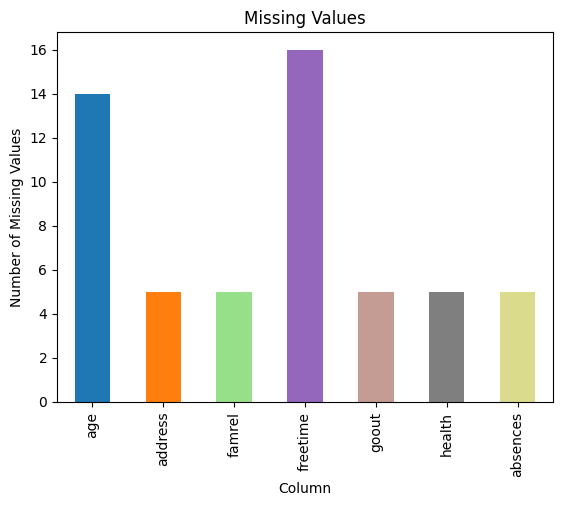

In [51]:

#Uppgift 1 d)

from data_utils import plot_missing_values


plot_missing_values(df)

In [52]:
#Uppgift 1 e)

NaN_rows_freetime =df.loc[df["freetime"].isnull()].index.tolist()
print(f"The rows with missing values are: {NaN_rows_freetime}")

The rows with missing values are: [87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]


In [53]:
#Uppgift 1 f)

NaN_rows_age =df.loc[df["freetime"].isnull() | df["age"].isnull()].index.tolist()

print(f"The rows with missing values are: {NaN_rows_age}")

The rows with missing values are: [20, 71, 87, 99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]


In [54]:

#Uppgift 1 g)

mean_value = round((df.isnull().sum(axis=1) > 1).mean(), 4)
print(f" The mean number of missing values per row is: {mean_value}")


 The mean number of missing values per row is: 0.0127


## Uppgift 2 - Clean Data



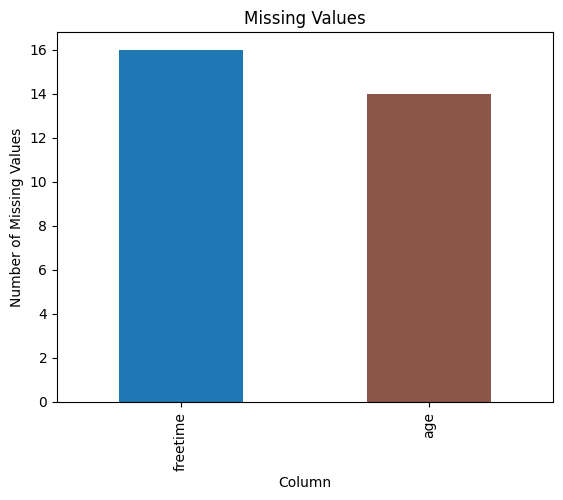

In [55]:

#Uppgift 2 a)

subset_df = df.loc[:, ["freetime", "age"]]
plot_missing_values(subset_df)



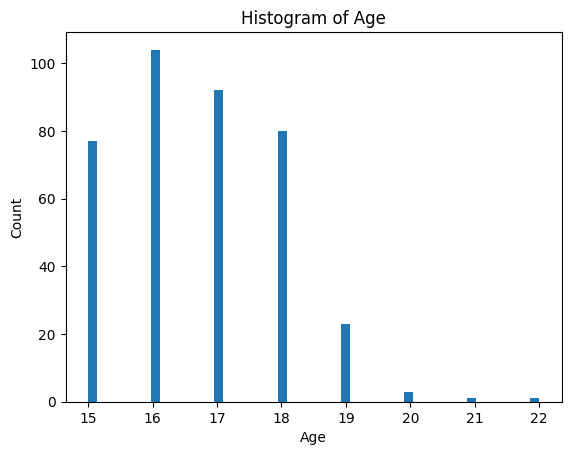

In [56]:

#Uppgift 2 b)

df_age = df["age"]
plt.hist(df_age.dropna(), bins=50)

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [57]:

#Uppgift 2 c)

print(df.columns)

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [58]:

#Uppgift 2 d)

print(df["higher"].unique())


['yes' 'no']


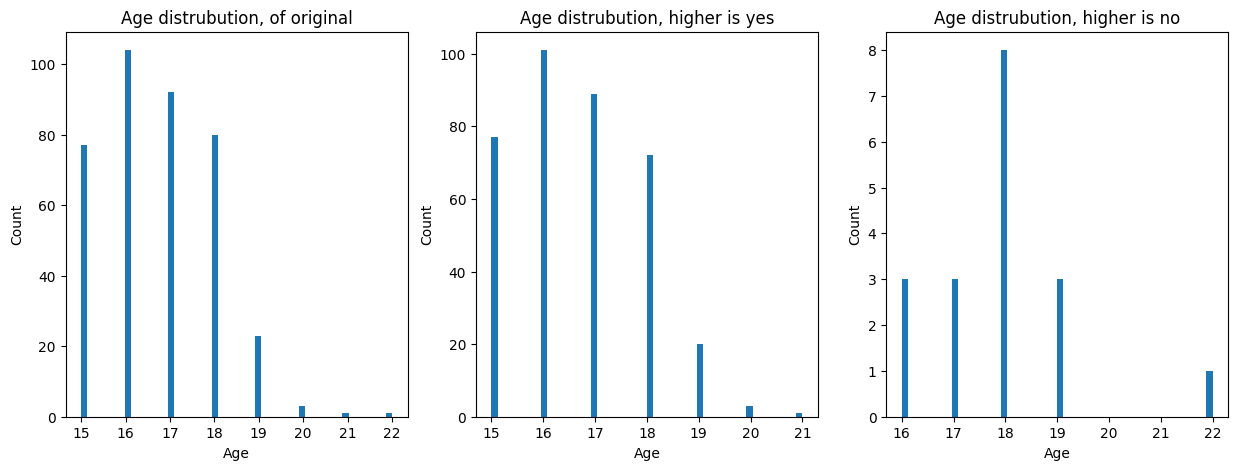

In [59]:

#Uppgift 2 e)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(df["age"].dropna(), bins=50)
plt.title("Age distrubution, of original")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(df[df["higher"] == "yes"]["age"].dropna(), bins=50)
plt.title("Age distrubution, higher is yes")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(df[df["higher"] == "no"]["age"].dropna(), bins=50)
plt.title("Age distrubution, higher is no")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

In [60]:

#Uppgift 2 f)

df["Alcohol"] = df["Dalc"] + df["Walc"]

print(df["Alcohol"])

0      2
1      2
2      5
3      2
4      3
      ..
390    9
391    7
392    6
393    7
394    6
Name: Alcohol, Length: 395, dtype: int64


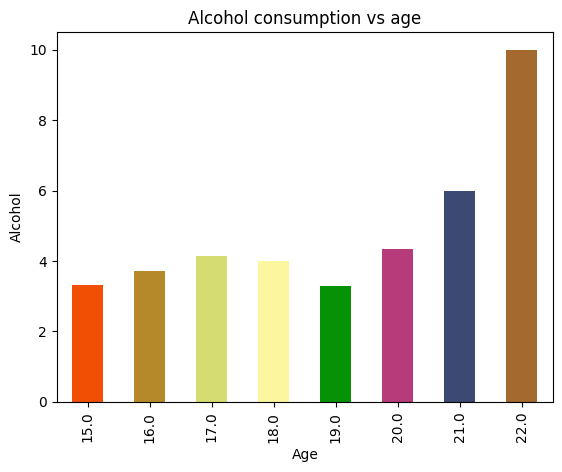

In [61]:
#Uppgift 2 g)

colors = [(np.random.rand(), np.random.rand(), np.random.rand()) for _ in range(len(df.groupby("age")["Alcohol"].mean()))]

df_alcohol = df.groupby("age")["Alcohol"].mean().plot(kind="bar", color = colors)
plt.title("Alcohol consumption vs age")
plt.xlabel("Age")
plt.ylabel("Alcohol")
plt.show()


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,3.0,4.0,1,1,3.0,6.0,5,6,6,2
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,3.0,3.0,1,1,3.0,4.0,5,5,6,2
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,3.0,2.0,2,3,3.0,10.0,7,8,10,5
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,2.0,2.0,1,1,5.0,2.0,15,14,15,2
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,3.0,2.0,1,2,5.0,4.0,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,4.0,4,5,4.0,11.0,9,9,9,9
391,391,MS,M,17.0,U,LE3,T,3,1,services,...,4.0,5.0,3,4,2.0,3.0,14,16,16,7
392,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,3.0,3,3,3.0,3.0,10,8,7,6
393,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,1.0,3,4,5.0,0.0,11,12,10,7
